In [1]:
from pycaret.classification import setup, compare_models, tune_model, predict_model
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import boto3
import pandas as pd
from io import StringIO

In [20]:
# # dane logowania
ACCESS_KEY = "DO008PFTK8WXHN49MPRR"
SECRET_KEY = "R8yFQxYbjT/FsfgPK0UkKySjS3VBf+j+Zc3VP8gTPnI"
SPACE_NAME = "projektykk"          
REGION = "fra1"                               
FILE_NAME = "halfmarathon_wroclaw_2023__final.csv"

# URL endpoint (dla regionu)
ENDPOINT = f"https://fra1.digitaloceanspaces.com"

#  Konfiguracja klienta S3
session = boto3.session.Session()
client = session.client('s3',
                        region_name=REGION,
                        endpoint_url=ENDPOINT,
                        aws_access_key_id=ACCESS_KEY,
                        aws_secret_access_key=SECRET_KEY)

# Pobieranie danych jako string
response = client.get_object(Bucket=SPACE_NAME, Key=FILE_NAME)
csv_content = response['Body'].read().decode('utf-8')

# Wczytanie do DataFrame
df_2023 = pd.read_csv(StringIO(csv_content), sep=';')

# Podgląd danych
df_2023.head()



,Miejsce,Numer startowy,Imię,Nazwisko,Miasto,Kraj,Drużyna,Płeć,Płeć Miejsce,Kategoria wiekowa,...,10 km Tempo,15 km Czas,15 km Miejsce Open,15 km Tempo,20 km Czas,20 km Miejsce Open,20 km Tempo,Tempo Stabilność,Czas,Tempo
0,1.0,1787,TOMASZ,GRYCKO,NaN,POL,UKS BLIZA WŁADYSŁAWOWO,M,1.0,M30,...,2.926667,00:44:47,1.0,3.106667,01:01:43,1.0,3.386667,0.031400,01:04:59,3.080509
1,2.0,3,ARKADIUSZ,GARDZIELEWSKI,WROCŁAW,POL,ARKADIUSZGARDZIELEWSKI.PL,M,2.0,M30,...,2.983333,00:45:26,2.0,3.143333,01:03:08,2.0,3.540000,0.038000,01:06:23,3.146875
2,3.0,3832,KRZYSZTOF,HADAS,POZNAŃ,POL,NaN,M,3.0,M20,...,3.123333,00:47:34,3.0,3.236667,01:05:09,3.0,3.516667,0.024067,01:08:24,3.242475
3,4.0,416,DAMIAN,DYDUCH,KĘPNO,POL,AZS POLITECHNIKA OPOLSKA,M,4.0,M30,...,3.196667,00:48:49,5.0,3.330000,01:06:54,4.0,3.616667,0.025467,01:10:16,3.330963
4,5.0,8476,KAMIL,MAŃKOWSKI,MIRKÓW,POL,PARKRUN WROCŁAW,M,5.0,M20,...,3.276667,00:49:31,7.0,3.386667,01:07:27,5.0,3.586667,0.023000,01:10:27,3.339654


In [21]:
# dane logowania
ACCESS_KEY = "DO008PFTK8WXHN49MPRR"
SECRET_KEY = "R8yFQxYbjT/FsfgPK0UkKySjS3VBf+j+Zc3VP8gTPnI"
SPACE_NAME = "projektykk"          
REGION = "fra1"                               
FILE_NAME = "halfmarathon_wroclaw_2024__final.csv"

# URL endpoint (dla regionu)
ENDPOINT = f"https://fra1.digitaloceanspaces.com"

#  Konfiguracja klienta S3
session = boto3.session.Session()
client = session.client('s3',
                        region_name=REGION,
                        endpoint_url=ENDPOINT,
                        aws_access_key_id=ACCESS_KEY,
                        aws_secret_access_key=SECRET_KEY)

# Pobieranie danych jako string
response = client.get_object(Bucket=SPACE_NAME, Key=FILE_NAME)
csv_content = response['Body'].read().decode('utf-8')

# Wczytanie do DataFrame
df_2024 = pd.read_csv(StringIO(csv_content), sep=';')

# Podgląd danych
df_2024.head()



,Miejsce,Numer startowy,Imię,Nazwisko,Miasto,Kraj,Drużyna,Płeć,Płeć Miejsce,Kategoria wiekowa,...,10 km Tempo,15 km Czas,15 km Miejsce Open,15 km Tempo,20 km Czas,20 km Miejsce Open,20 km Tempo,Tempo Stabilność,Czas,Tempo
0,1.0,596,NIKODEM,DWORCZAK,KOŚCIAN,POL,NaN,M,1.0,M20,...,2.920000,00:45:07,2.0,3.083333,01:00:33,1.0,3.086667,0.007267,01:04:03,3.036265
1,2.0,616,MATEUSZ,KACZOR,RADOM,POL,RLTL OPTIMA RADOM,M,2.0,M20,...,2.920000,00:45:07,3.0,3.083333,01:00:38,2.0,3.103333,0.008267,01:04:24,3.052856
2,3.0,154,PATRYK,KOZŁOWSKI,RADOM,POL,RLTL-ZTE-RADOM,M,3.0,M20,...,2.920000,00:45:07,1.0,3.083333,01:00:59,3.0,3.173333,0.012467,01:04:40,3.065497
3,4.0,591,DARIUSZ,BORATYŃSKI,WROCŁAW,POL,WOSIEK TEAM AZS AWF WROCŁAW,M,4.0,M20,...,3.110000,00:47:48,4.0,3.293333,01:05:40,4.0,3.573333,0.028667,01:09:44,3.305681
4,5.0,521,SZYMON,DOROŻYŃSKI,LUBON,POL,SZYMI TEAM AZS POLITECHNIKA OPOLSKA,M,5.0,M30,...,3.153333,00:48:09,5.0,3.453333,01:06:05,5.0,3.586667,0.039800,01:10:05,3.322272


In [11]:
df.isnull().sum()

Miejsce                       800
Numer startowy                  0
Imię                            0
Nazwisko                        0
Miasto                       1089
Kraj                          800
Drużyna                      5529
Płeć                            2
Płeć Miejsce                  800
Kategoria wiekowa              11
Kategoria wiekowa Miejsce     809
Rocznik                       201
5 km Czas                     827
5 km Miejsce Open             827
5 km Tempo                    827
10 km Czas                    811
10 km Miejsce Open            811
10 km Tempo                   834
15 km Czas                    809
15 km Miejsce Open            809
15 km Tempo                   814
20 km Czas                    806
20 km Miejsce Open            806
20 km Tempo                   813
Tempo Stabilność              840
Czas                            0
Tempo                         800
dtype: int64

In [22]:
# Snippet pomocniczy - zmiana czasu na sekundy

def convert_time_to_seconds(time):
    if pd.isnull(time) or time in ['DNS', 'DNF']:
        return None
    time = time.split(':')
    return int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])

In [23]:
df_2023['Czas'] = df_2023['Czas'].apply(convert_time_to_seconds)

In [24]:
df_2023['Czas'].head()

0    3899.0
1    3983.0
2    4104.0
3    4216.0
4    4227.0
Name: Czas, dtype: float64

In [25]:
df_2023.dtypes

Miejsce                      float64
Numer startowy                 int64
Imię                          object
Nazwisko                      object
Miasto                        object
Kraj                          object
Drużyna                       object
Płeć                          object
Płeć Miejsce                 float64
Kategoria wiekowa             object
Kategoria wiekowa Miejsce    float64
Rocznik                      float64
5 km Czas                     object
5 km Miejsce Open            float64
5 km Tempo                   float64
10 km Czas                    object
10 km Miejsce Open           float64
10 km Tempo                  float64
15 km Czas                    object
15 km Miejsce Open           float64
15 km Tempo                  float64
20 km Czas                    object
20 km Miejsce Open           float64
20 km Tempo                  float64
Tempo Stabilność             float64
Czas                         float64
Tempo                        float64
d

In [28]:
# Snippet pomocniczy - zmiana czasu na sekundy

def convert_time_to_seconds(time):
    if pd.isnull(time) or time in ['DNS', 'DNF']:
        return None
    time = time.split(':')
    return int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])

In [29]:
df_2024['Czas'] = df_2024['Czas'].apply(convert_time_to_seconds)

In [30]:
df_2023['Czas'].head()

0    3899.0
1    3983.0
2    4104.0
3    4216.0
4    4227.0
Name: Czas, dtype: float64

In [32]:
print(df_2023.columns.difference(df_2023.columns))
print(df_2024.columns.difference(df_2024.columns))

Index([], dtype='object')
Index([], dtype='object')


In [33]:
df_2023['Rocznik'].head()

0    1992.0
1    1986.0
2    1996.0
3    1988.0
4    1995.0
Name: Rocznik, dtype: float64

In [34]:
df_23_pred = df_2023[['Płeć', 'Rocznik', '5 km Czas', 'Czas']]

In [35]:
df_23_pred.head()

,Płeć,Rocznik,5 km Czas,Czas
0,M,1992.0,00:14:37,3899.0
1,M,1986.0,00:14:48,3983.0
2,M,1996.0,00:15:46,4104.0
3,M,1988.0,00:16:11,4216.0
4,M,1995.0,00:16:12,4227.0


In [37]:
def convert_time_to_seconds(time):
    if pd.isnull(time) or time in ['DNS', 'DNF']:
        return None
    time = time.split(':')
    return int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])

# Konwersja dwóch kolumn: '5 km Czas'
df_23_pred['5 km Czas'] = df_23_pred['5 km Czas'].apply(convert_time_to_seconds)


df_23_pred.head()

,Płeć,Rocznik,5 km Czas,Czas
0,M,1992.0,877.0,3899.0
1,M,1986.0,888.0,3983.0
2,M,1996.0,946.0,4104.0
3,M,1988.0,971.0,4216.0
4,M,1995.0,972.0,4227.0


In [38]:
df_23_pred.isnull().sum()

Płeć           2
Rocznik      201
5 km Czas    827
Czas         800
dtype: int64

In [42]:
#sprawdzam, ile procent stanowia te braki danych
missing = df_23_pred.isna().sum()
percent_missing = (missing / len(df_23_pred)) * 100
print(percent_missing)

Płeć         0.022346
Rocznik      2.245810
5 km Czas    9.240223
Czas         8.938547
dtype: float64


In [43]:
len(df_23_pred)

8950

In [45]:
#usuwam braki danych 
df_23_pred = df_23_pred.dropna()
len(df_23_pred)

7923

In [46]:
df_23_pred.isnull().sum()

Płeć         0
Rocznik      0
5 km Czas    0
Czas         0
dtype: int64

In [47]:
# zmieniam zmienna plec na wartosci liczbowe 
plec_map = {'K': 0, 'M': 1}

df_23_pred['Płeć'] = df_23_pred['Płeć'].map(plec_map)


print(df_23_pred['Płeć'].value_counts())


Płeć
1    5689
0    2234
Name: count, dtype: int64


In [48]:
# jesli potem do wynikow bedzie potzrebne z powrotem odzyskać 'K' i 'M':
# df['Płeć_text'] = df['Płeć'].map({0: 'K', 1: 'M'})


In [50]:
#zmieniam kolumne rocznik na wiek 
from datetime import datetime

current_year = datetime.now().year
df_23_pred['Wiek'] = current_year - df_23_pred['Rocznik']


In [51]:
df_23_pred.head()

,Płeć,Rocznik,5 km Czas,Czas,Wiek
0,1,1992.0,877.0,3899.0,33.0
1,1,1986.0,888.0,3983.0,39.0
2,1,1996.0,946.0,4104.0,29.0
3,1,1988.0,971.0,4216.0,37.0
4,1,1995.0,972.0,4227.0,30.0


In [52]:
df_23_pred.drop(columns='Rocznik', inplace=True)

In [53]:
df_23_pred.head()

,Płeć,5 km Czas,Czas,Wiek
0,1,877.0,3899.0,33.0
1,1,888.0,3983.0,39.0
2,1,946.0,4104.0,29.0
3,1,971.0,4216.0,37.0
4,1,972.0,4227.0,30.0


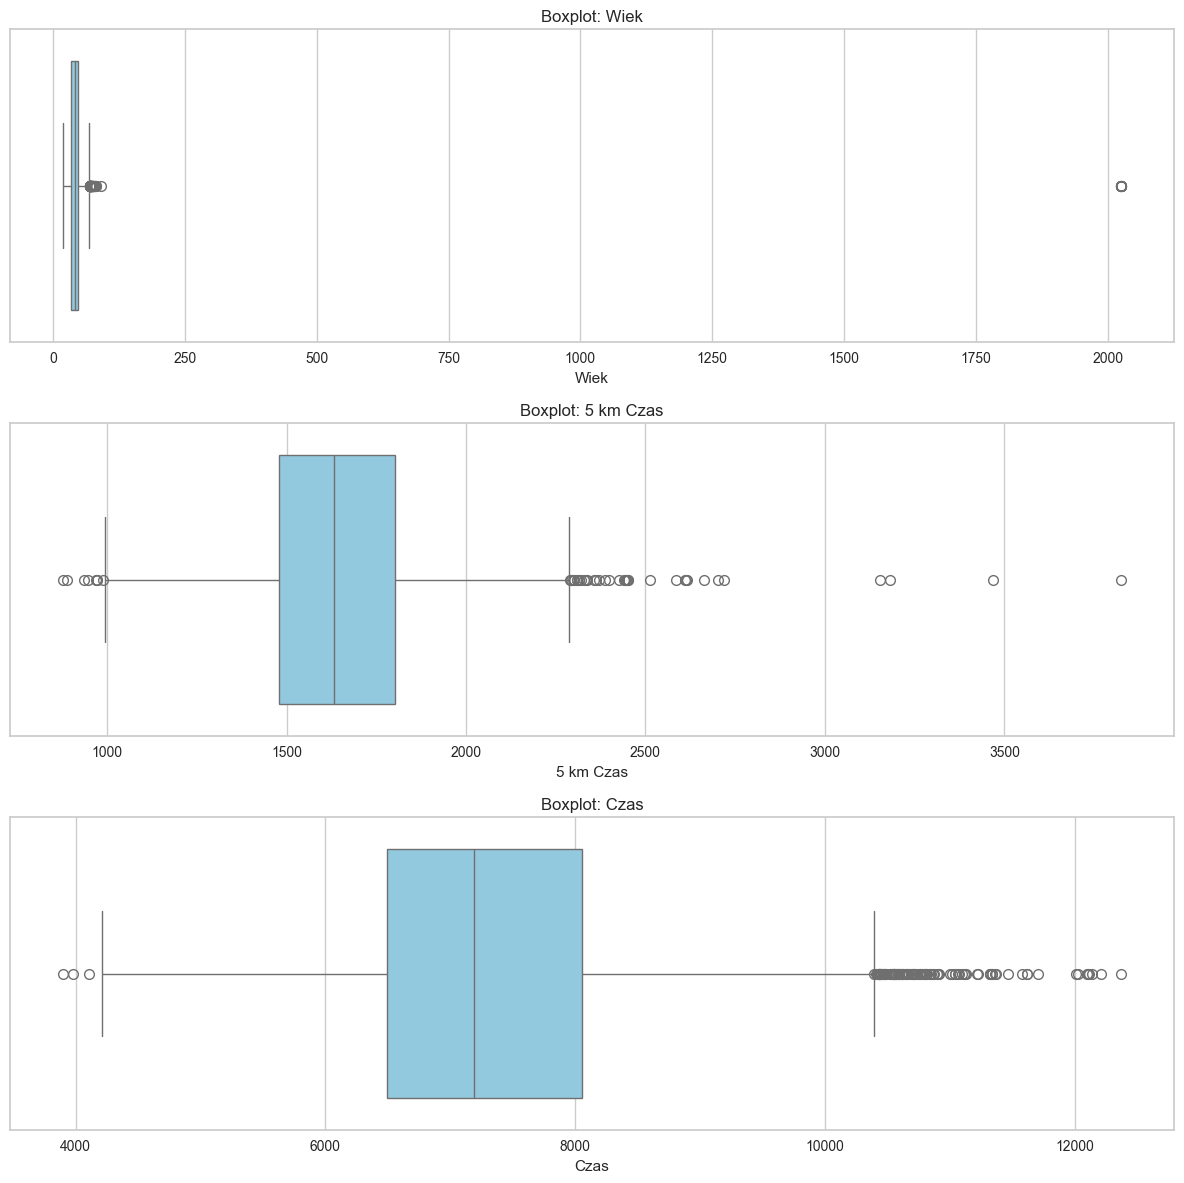

In [55]:
# sprawdzam wartosci odstajace

import matplotlib.pyplot as plt
import seaborn as sns

# Lista kolumn do wykresów
kolumny = ['Wiek', '5 km Czas', 'Czas']

# Ustawienia wykresów
plt.figure(figsize=(12, 4 * len(kolumny)))

for i, col in enumerate(kolumny, 1):
    plt.subplot(len(kolumny), 1, i)
    sns.boxplot(x=df_23_pred[col], orient='h', color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


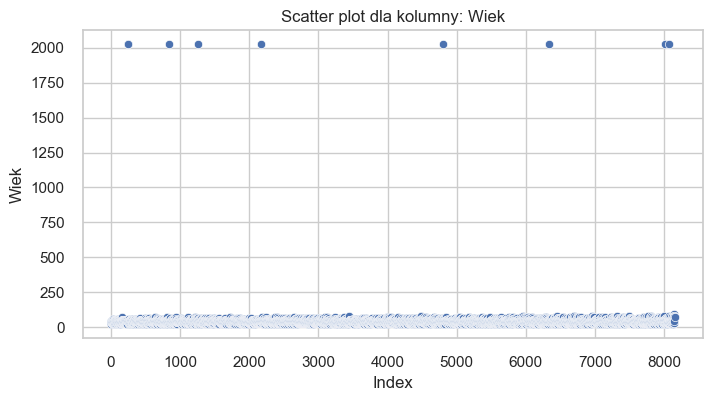

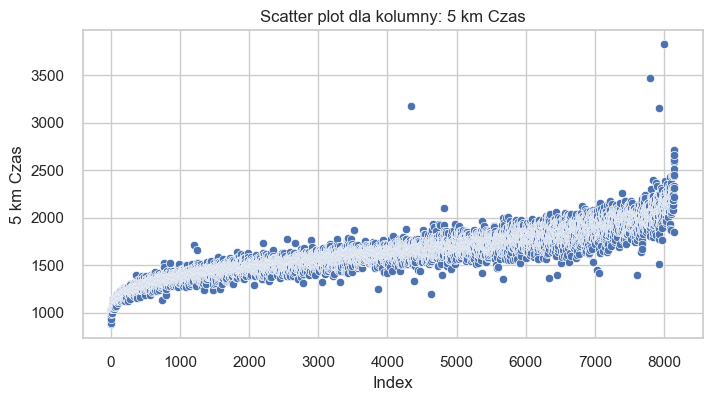

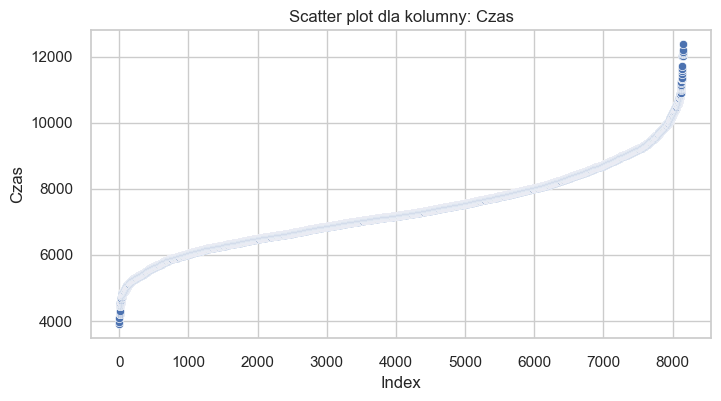

In [58]:
# jako scatter plots 

# Lista kolumn do sprawdzenia
cols = ['Wiek', '5 km Czas', 'Czas']

# Ustaw styl
sns.set(style="whitegrid")

# Tworzenie osobnych wykresów
for col in cols:
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df_23_pred, x=df_23_pred.index, y=col)
    plt.title(f'Scatter plot dla kolumny: {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.show()

In [60]:
# sprawdzam, jakie konkretnie wartości sa w wieku
# Wylicz Q1, Q3 i IQR dla kolumny "Wiek"
Q1 = df_23_pred['Wiek'].quantile(0.25)
Q3 = df_23_pred['Wiek'].quantile(0.75)
IQR = Q3 - Q1

# Filtruj wartości odstające
outliers = df_23_pred[(df_23_pred['Wiek'] < Q1 - 1.5 * IQR) | (df_23_pred['Wiek'] > Q3 + 1.5 * IQR)]

# Zobacz ile ich jest i jakie to wartości
print("Liczba wartości odstających:", len(outliers))
print("Wartości odstające:")
print(outliers['Wiek'].value_counts().sort_index())


Liczba wartości odstających: 84
Wartości odstające:
Wiek
70.0      17
71.0      12
72.0       4
73.0      13
74.0       6
75.0       5
76.0       8
77.0       1
78.0       2
79.0       4
81.0       1
82.0       1
91.0       1
2025.0     9
Name: count, dtype: int64


In [61]:
Q1 = df_23_pred[['5 km Czas', 'Czas']].quantile(0.25)
Q3 = df_23_pred[['5 km Czas', 'Czas']].quantile(0.75)
IQR = Q3 - Q1

# Filtrujemy wartości odstające w '5 km Czas' i 'Czas'
df_23_pred_clean = df_23_pred[~(
    ((df_23_pred[['5 km Czas', 'Czas']] < (Q1 - 1.5 * IQR)) |
     (df_23_pred[['5 km Czas', 'Czas']] > (Q3 + 1.5 * IQR)))
    .any(axis=1)
)]

# Dodatkowo usuwamy osoby starsze niż 100 lat
df_23_pred_clean = df_23_pred_clean[df_23_pred_clean['Wiek'] <= 100]

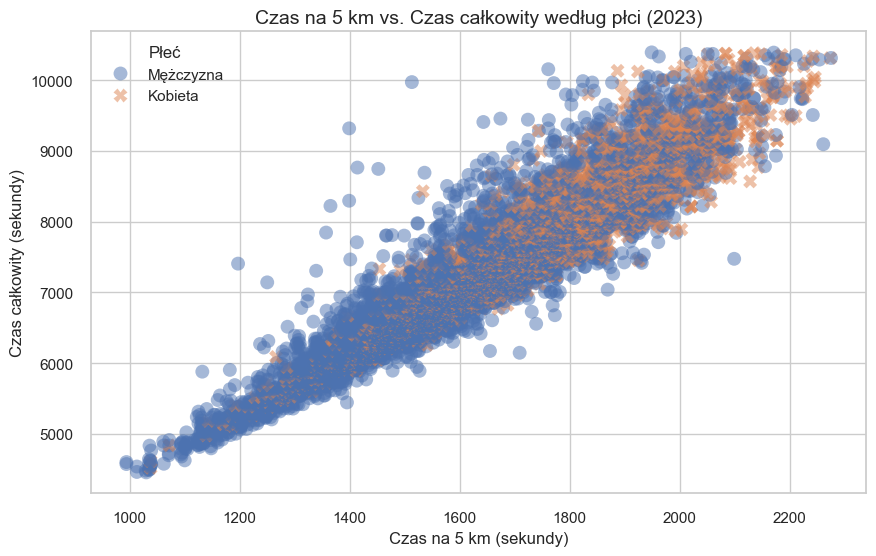

In [64]:
# do legendy 
df_plot = df_23_pred_clean.copy()
df_plot['Płeć'] = df_plot['Płeć'].map({0: 'Kobieta', 1: 'Mężczyzna'})

# Ustawienie stylu
sns.set(style="whitegrid")

# Tworzenie wykresu rozrzutu
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot, 
    x='5 km Czas', 
    y='Czas', 
    hue='Płeć', 
    style='Płeć',
    alpha=0.5,          
    s=100,              
    edgecolor='none'    
)

# Konfiguracja wykresu
plt.title('Czas na 5 km vs. Czas całkowity według płci (2023)', fontsize=14)
plt.xlabel('Czas na 5 km (sekundy)', fontsize=12)
plt.ylabel('Czas całkowity (sekundy)', fontsize=12)
plt.legend(title='Płeć')
plt.grid(True)

# Wyświetlenie wykresu
plt.show()


In [65]:
from pycaret.regression import setup, compare_models, predict_model, evaluate_model, plot_model, finalize_model, save_model, pull

exp = setup(
    data=df_23_pred_clean,
    target='Czas',
    session_id=123,
    verbose=True
)

best_model = exp.compare_models(sort='R2')


,Description,Value
0,Session id,123
1,Target,Czas
2,Target type,Regression
3,Original data shape,"(7781, 4)"
4,Transformed data shape,"(7781, 4)"
5,Transformed train set shape,"(5446, 4)"
6,Transformed test set shape,"(2335, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,278.4152,146595.6977,382.3052,0.8854,0.0493,0.0369,0.0060
en,Elastic Net,278.3986,146582.2398,382.2864,0.8854,0.0493,0.0369,0.0060
llar,Lasso Least Angle Regression,278.4152,146595.7008,382.3052,0.8854,0.0493,0.0369,0.0040
br,Bayesian Ridge,278.3893,146575.0836,382.2769,0.8854,0.0493,0.0369,0.0050
lr,Linear Regression,278.4713,146616.7547,382.3347,0.8853,0.0493,0.0369,0.2270
ridge,Ridge Regression,278.4712,146616.7219,382.3346,0.8853,0.0493,0.0369,0.0040
lar,Least Angle Regression,278.4713,146616.7633,382.3347,0.8853,0.0493,0.0369,0.0050
omp,Orthogonal Matching Pursuit,278.3915,146637.6711,382.3764,0.8853,0.0493,0.0369,0.0050
gbr,Gradient Boosting Regressor,278.2129,148869.3469,385.2036,0.8836,0.0496,0.0369,0.0330
huber,Huber Regressor,275.4458,150606.7847,387.2938,0.8823,0.0496,0.0362,0.0100


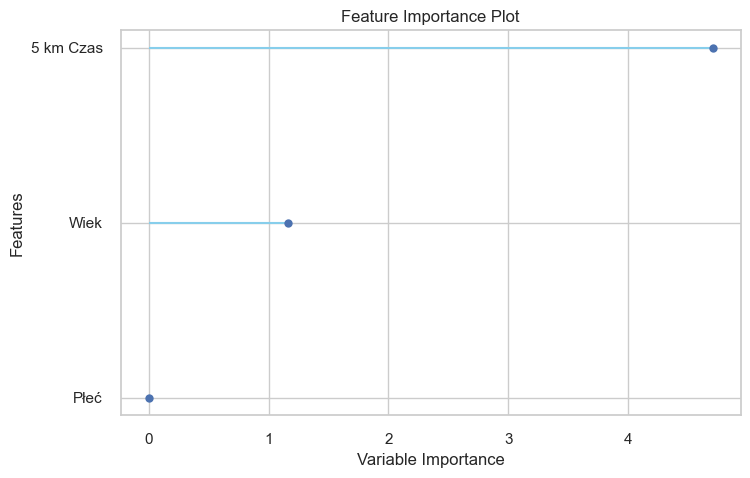

In [66]:
from pycaret.regression import plot_model

plot_model(best_model, plot='feature')


In [68]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [69]:
print(best_model)

Lasso(random_state=123)


In [70]:
final_model = finalize_model(best_model)
save_model(final_model, 'model_lasso_v1_2023')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Płeć', '5 km Czas', 'Wiek'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('actual_estimator', Lasso(random_state=123))]),
 'model_lasso_v1_2023.pkl')

In [71]:
###

In [72]:
####

In [73]:
####

In [75]:
# Czyszczenie danych z 2024

In [76]:
df_24_pred = df_2024[['Płeć', 'Rocznik', '5 km Czas', 'Czas']]

In [77]:
df_24_pred.head()

,Płeć,Rocznik,5 km Czas,Czas
0,M,1998.0,00:15:06,3843.0
1,M,1997.0,00:15:06,3864.0
2,M,1998.0,00:15:06,3880.0
3,M,1997.0,00:15:47,4184.0
4,M,1992.0,00:15:07,4205.0


In [78]:
def convert_time_to_seconds(time):
    if pd.isnull(time) or time in ['DNS', 'DNF']:
        return None
    time = time.split(':')
    return int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])

# Konwersja dwóch kolumn: '5 km Czas'
df_24_pred['5 km Czas'] = df_24_pred['5 km Czas'].apply(convert_time_to_seconds)


df_24_pred.head()

,Płeć,Rocznik,5 km Czas,Czas
0,M,1998.0,906.0,3843.0
1,M,1997.0,906.0,3864.0
2,M,1998.0,906.0,3880.0
3,M,1997.0,947.0,4184.0
4,M,1992.0,907.0,4205.0


In [79]:
#zmieniam kolumne rocznik na wiek 
from datetime import datetime

current_year = datetime.now().year
df_24_pred['Wiek'] = current_year - df_24_pred['Rocznik']


In [80]:
df_24_pred.head()

,Płeć,Rocznik,5 km Czas,Czas,Wiek
0,M,1998.0,906.0,3843.0,27.0
1,M,1997.0,906.0,3864.0,28.0
2,M,1998.0,906.0,3880.0,27.0
3,M,1997.0,947.0,4184.0,28.0
4,M,1992.0,907.0,4205.0,33.0


In [81]:
# zmieniam zmienna plec na wartosci liczbowe 
plec_map = {'K': 0, 'M': 1}

df_24_pred['Płeć'] = df_24_pred['Płeć'].map(plec_map)


print(df_24_pred['Płeć'].value_counts())


Płeć
1.0    9004
0.0    3994
Name: count, dtype: int64


In [82]:
df_24_pred.isnull().sum()

Płeć            9
Rocznik       284
5 km Czas    2719
Czas         2707
Wiek          284
dtype: int64

In [83]:

len(df_24_pred)

13007

In [84]:
#usuwam braki danych 
df_24_pred = df_24_pred.dropna()
len(df_24_pred)

10004

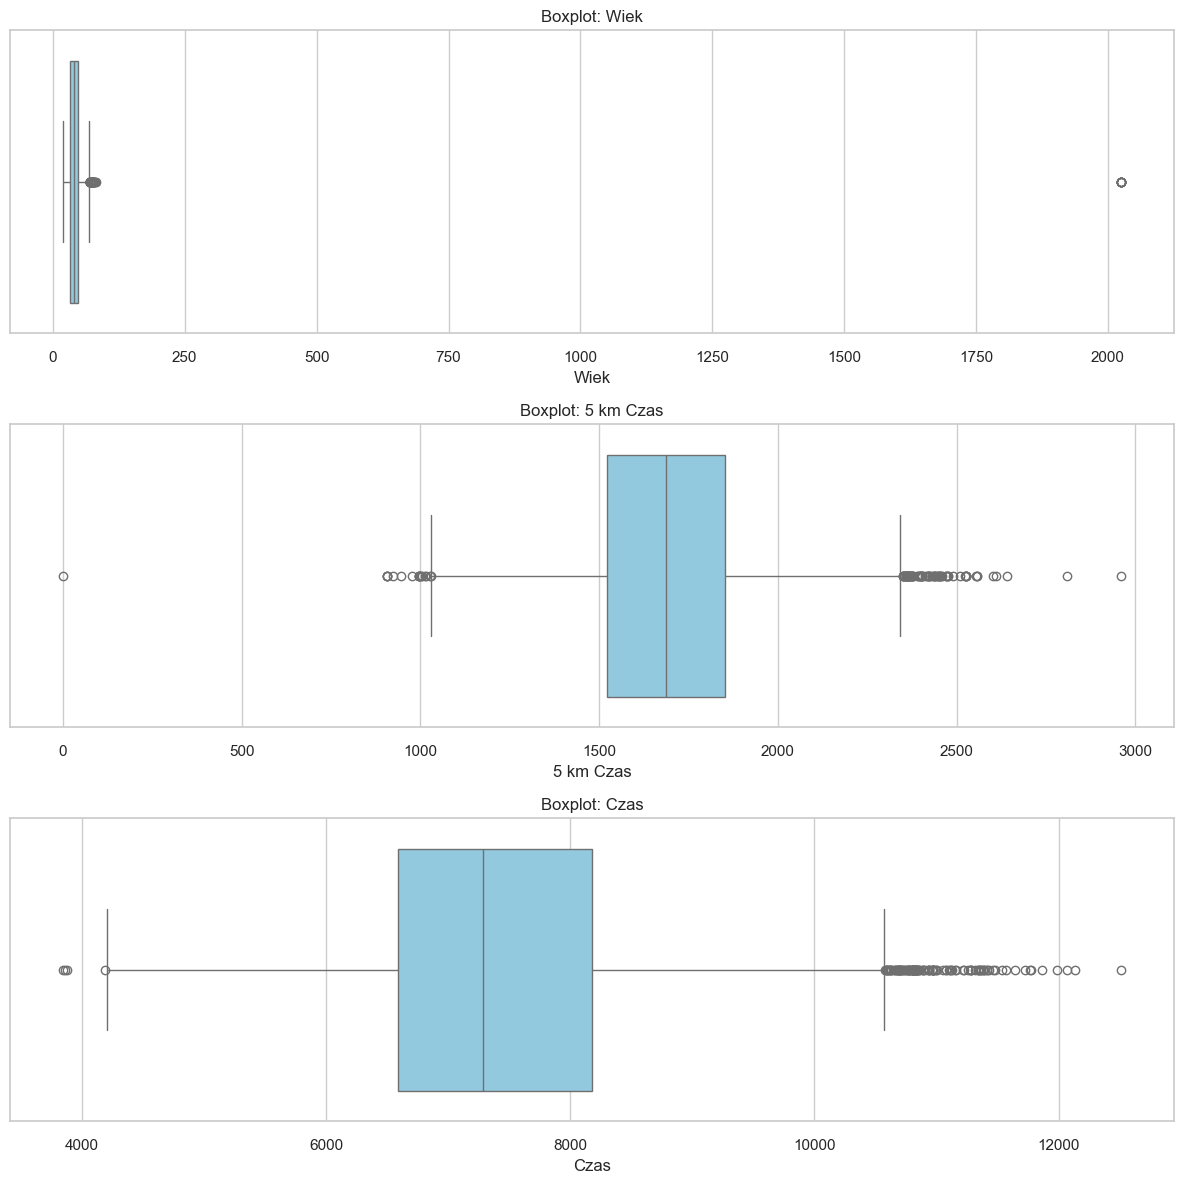

In [85]:
# sprawdzam wartosci odstajace

import matplotlib.pyplot as plt
import seaborn as sns

# Lista kolumn do wykresów
kolumny = ['Wiek', '5 km Czas', 'Czas']

# Ustawienia wykresów
plt.figure(figsize=(12, 4 * len(kolumny)))

for i, col in enumerate(kolumny, 1):
    plt.subplot(len(kolumny), 1, i)
    sns.boxplot(x=df_24_pred[col], orient='h', color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


In [86]:
# sprawdzam, jakie konkretnie wartości sa w wieku
# Wylicz Q1, Q3 i IQR dla kolumny "Wiek"
Q1 = df_24_pred['Wiek'].quantile(0.25)
Q3 = df_24_pred['Wiek'].quantile(0.75)
IQR = Q3 - Q1

# Filtruj wartości odstające
outliers = df_24_pred[(df_24_pred['Wiek'] < Q1 - 1.5 * IQR) | (df_24_pred['Wiek'] > Q3 + 1.5 * IQR)]

# Zobacz ile ich jest i jakie to wartości
print("Liczba wartości odstających:", len(outliers))
print("Wartości odstające:")
print(outliers['Wiek'].value_counts().sort_index())


Liczba wartości odstających: 76
Wartości odstające:
Wiek
70.0      19
71.0      11
72.0       8
73.0       8
74.0       7
75.0       5
76.0       4
77.0       2
78.0       1
80.0       1
81.0       1
2025.0     9
Name: count, dtype: int64


In [87]:
Q1 = df_24_pred[['5 km Czas', 'Czas']].quantile(0.25)
Q3 = df_24_pred[['5 km Czas', 'Czas']].quantile(0.75)
IQR = Q3 - Q1

# Filtrujemy wartości odstające w '5 km Czas' i 'Czas'
df_24_pred_clean = df_24_pred[~(
    ((df_24_pred[['5 km Czas', 'Czas']] < (Q1 - 1.5 * IQR)) |
     (df_24_pred[['5 km Czas', 'Czas']] > (Q3 + 1.5 * IQR)))
    .any(axis=1)
)]

# Dodatkowo usuwamy osoby starsze niż 100 lat
df_24_pred_clean = df_24_pred_clean[df_24_pred_clean['Wiek'] <= 100]

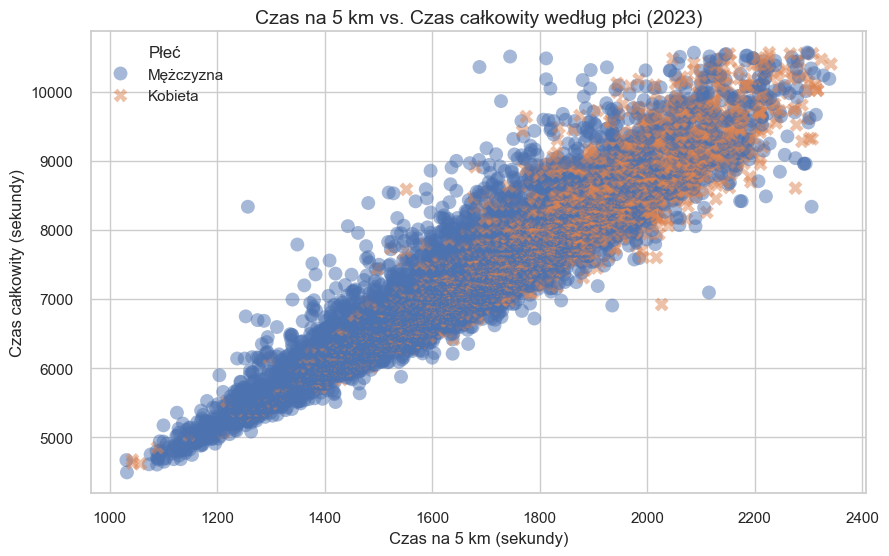

In [88]:
# do legendy 
df_plot = df_24_pred_clean.copy()
df_plot['Płeć'] = df_plot['Płeć'].map({0: 'Kobieta', 1: 'Mężczyzna'})

# Ustawienie stylu
sns.set(style="whitegrid")

# Tworzenie wykresu rozrzutu
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_plot, 
    x='5 km Czas', 
    y='Czas', 
    hue='Płeć', 
    style='Płeć',
    alpha=0.5,          
    s=100,              
    edgecolor='none'    
)

# Konfiguracja wykresu
plt.title('Czas na 5 km vs. Czas całkowity według płci (2023)', fontsize=14)
plt.xlabel('Czas na 5 km (sekundy)', fontsize=12)
plt.ylabel('Czas całkowity (sekundy)', fontsize=12)
plt.legend(title='Płeć')
plt.grid(True)

# Wyświetlenie wykresu
plt.show()


In [89]:
df_24_pred_clean.head()

,Płeć,Rocznik,5 km Czas,Czas,Wiek
16,1.0,1989.0,1032.0,4491.0,36.0
18,1.0,1981.0,1088.0,4604.0,44.0
19,1.0,1992.0,1073.0,4608.0,33.0
20,0.0,1995.0,1057.0,4616.0,30.0
21,0.0,1991.0,1042.0,4625.0,34.0


In [93]:
df_24_pred_clean.drop(columns='Rocznik', inplace=True)

In [94]:
df_24_pred_clean.head()

,Płeć,5 km Czas,Czas,Wiek
16,1.0,1032.0,4491.0,36.0
18,1.0,1088.0,4604.0,44.0
19,1.0,1073.0,4608.0,33.0
20,0.0,1057.0,4616.0,30.0
21,0.0,1042.0,4625.0,34.0


In [95]:
# laduje model 
from pycaret.regression import load_model, predict_model

model = load_model('model_lasso_v1_2023')


Transformation Pipeline and Model Successfully Loaded


In [96]:
# sprawdzamy jak dziala na drugim df 

predictions = predict_model(model, data=df_24_pred_clean)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,329.2632,175161.9062,418.5235,0.8638,0.0541,0.0441


In [97]:
print(predictions.head())

    Płeć  5 km Czas  Wiek    Czas  prediction_label
16   1.0     1032.0  36.0  4491.0       4448.100098
18   1.0     1088.0  44.0  4604.0       4717.580566
19   1.0     1073.0  33.0  4608.0       4638.034668
20   0.0     1057.0  30.0  4616.0       4560.446777
21   0.0     1042.0  34.0  4625.0       4493.371094


In [98]:
# liczę średnią różnicę między rzeczywistym a przewidywanym czasem:
(predictions['Czas'] - predictions['prediction_label']).abs().mean()


329.26315

In [99]:
import boto3

# # dane logowania
ACCESS_KEY = "DO008PFTK8WXHN49MPRR"
SECRET_KEY = "R8yFQxYbjT/FsfgPK0UkKySjS3VBf+j+Zc3VP8gTPnI"
SPACE_NAME = "projektykk"          
REGION = "fra1"                               

# URL endpoint (dla regionu)
ENDPOINT = f"https://fra1.digitaloceanspaces.com"

# Nazwa pliku lokalnie i jak ma być nazwany w Spaces
MODEL_FILENAME = "model_lasso_v1_2023.pkl"

#  Konfiguracja klienta S3
session = boto3.session.Session()
client = session.client('s3',
                        region_name=REGION,
                        endpoint_url=ENDPOINT,
                        aws_access_key_id=ACCESS_KEY,
                        aws_secret_access_key=SECRET_KEY)

# Wgrywanie modelu do Spaces
with open(MODEL_FILENAME, "rb") as f:
    client.upload_fileobj(f, SPACE_NAME, MODEL_FILENAME)

print("Model został wysłany do DigitalOcean Spaces.")


Model został wysłany do DigitalOcean Spaces.


In [100]:
print(df_23_pred_clean['Czas'].dtype)

float64


In [101]:
print(df_23_pred_clean['Czas'].isnull().sum())

0


In [102]:
print(df_23_pred_clean[['Czas']].head())
print(df_23_pred_clean['Czas'].dtype)
print(df_23_pred_clean['Czas'].isnull().sum())
print(df_23_pred_clean.sample(5))

      Czas
8   4456.0
9   4462.0
10  4483.0
11  4490.0
12  4496.0
float64
0
      Płeć  5 km Czas    Czas  Wiek
4418     1     1590.0  7319.0  34.0
7298     1     1913.0  9010.0  68.0
4697     1     1585.0  7432.0  49.0
5995     0     1791.0  8015.0  46.0
7502     1     1911.0  9205.0  57.0


In [103]:
X_test = pd.DataFrame([{
    "Płeć": 1,
    "Wiek": 27,
    "5 km Czas": 1740  # np. 29:00
}])

print(model.predict(X_test))

[7763.5396933]
